# Scikit Learn Tutorial #8 - Dimensionality Reduction
![Scikit Learn Logo](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

## What is Dimensionality Reduction?

Dimensionality Reduction is the process of reducing the number of features or variables. By reducing the number of dimensions in your feature space, you have fewer relationships between variables to consider and you are less likely to overfit your model. It also help with visualize data because you can reduce the dimensionality to 1-3 dimensions so you can easily visualize it.

Dimensionality Reduction can be divided into two groups:
<ul>
    <li>Feature Selection</li>
    <li>Feature Extraction</li>
</ul>

<b>Feature Selection</b> does what its name sounds like. It tries to find a subset of the original features. There are three strategies to select features. There is the filter, wrapper and embedded strategy. Feature Selection has a few advantages and disadvantages over feature extraction. The advantages of feature selection include its simplicity and its interpretability of the features. One of its disadvantages is that you lose all information from the features you dropped which possibly results in worse accuracy. 

<b>Feature Extraction</b> we create new features that are combinations of all the old features. We order the new features by how well they help predict the dependent variable (y). So we can reduce the dimensionality by choosing how many of the new features to keep and how many of the less important new features to delete. But eventhough we are deleting some of the new features we are still keeping most of the information because the new features are combinations of all the old features. 

## Principal component analysis (PCA)

Principal component analysis is a technique for feature extraction. So it creates new features by combining our input features in a specific way.

### How it works

1. Normalize data (0 mean and standard deviation 1)
2. Calculate <a href="https://en.wikipedia.org/wiki/Covariance">covariance</a> matrix.
3. Calculate eigen vectors and eigen values
4. Sort eigen values and their respective eigen vectors
5. Choose new dimensionality ( by selecting the first k eigen vectors)
6. Transform original data

### Ways to choose the new dimensionality

1. Select an arbitrary number of features (dimensions)
2. Select a threshold of <a href="https://en.wikipedia.org/wiki/Variance">variance</a> to maintain and add features until you reach the threshold

## Using PCA in Scikit Learn

Scikit Learn has multiple version of PCA. It has the normal PCA, IncrementalPCA which allows for partial computations (so you don't need to load the full dataset into memory), KernelPCA which allows for non-linear dimensionality reduction through the use of kernels as well as two versions of SparsePCA which goal is the extraction of the set of sparse components that best reconstruct the data.

In [1]:
import pandas as pd

iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
import numpy as np

X = np.array(iris.drop(['label'], axis=1))
y = np.array(iris['label'])

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # n_components specifies the new dimensionality
X_reduced = pca.fit(X).transform(X) # or just pca.fit_transform(X)
X_reduced = pd.DataFrame(data=X_reduced, columns=['x', 'y'])

In [4]:
X_reduced.head()

,x,y
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


In [5]:
print('Components:', pca.components_)
print('Explained Variance:', pca.explained_variance_)
print('Explained Variance Ratio:', pca.explained_variance_ratio_ )

Components: [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]
Explained Variance: [4.22484077 0.24224357]
Explained Variance Ratio: [0.92461621 0.05301557]


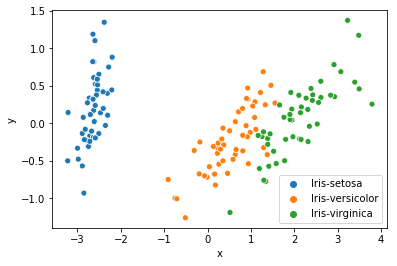

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='x', y='y', hue=y ,data=X_reduced)

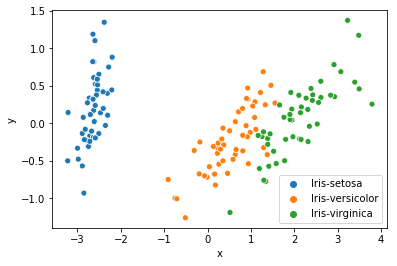

In [7]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=2, batch_size=3) # bacth_size specifies the number of samples per batch
X_reduced = pca.fit(X).transform(X) # or just pca.fit_transform(X)
X_reduced = pd.DataFrame(data=X_reduced, columns=['x', 'y'])
sns.scatterplot(x='x', y='y', hue=y ,data=X_reduced)

Kernel PCA is able to find a projection of the data that makes it linearly separable.

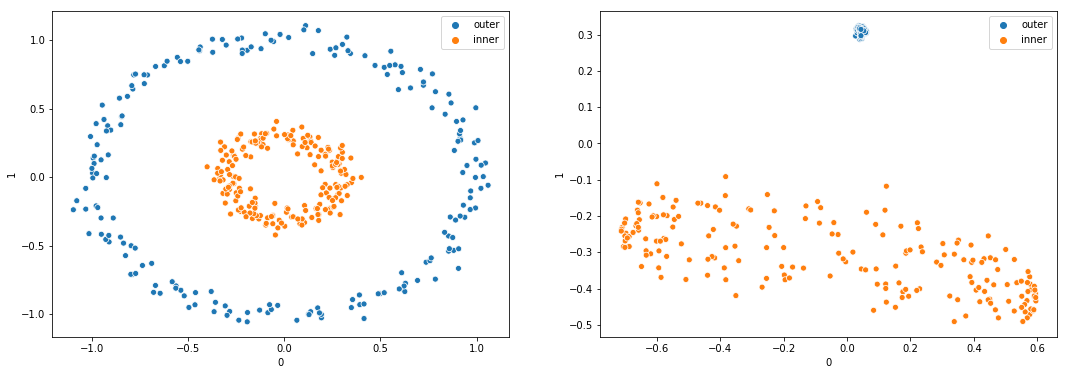

In [8]:
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA
np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)
y = np.array(['outer' if y_==0 else 'inner' for y_ in y])
kpca = KernelPCA(kernel="rbf", gamma=10) # gamma is the Kernel coefficient.
X_kpca = kpca.fit(X).transform(X)
X_kpca = pd.DataFrame(X_kpca)
X = pd.DataFrame(X)
fig, ax = plt.subplots(1,2, figsize=(18, 6))
sns.scatterplot(x=0, y=1, hue=y, data=X, ax=ax[0])
sns.scatterplot(x=0, y=1, hue=y, data=X_kpca, ax=ax[1])

## Resources

<ul>
    <li><a href="http://scikit-learn.org/stable/modules/decomposition.html#decompositions">Dimensionality Reduction (Scikit Learn Documentation)</a></li>
    <li><a href="http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html">PCA for Iris Dataset (Scikit Learn Documentation)</a></li>
    <li><a href="https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c">A One-Stop Shop for Principal Component Analysis (Matt Brems)</a></li>
    <li><a href="https://en.wikipedia.org/wiki/Dimensionality_reduction">Dimensionality Reduction (Wikipedia)</a></li>
    <li><a href="http://setosa.io/ev/principal-component-analysis/">Principal Component Analysis Explained Visually (setosa.io by Victor Powell and Lewis Lehe)
</a></li>
</ul>

## Conclusion

That was a quick overview of Dimensionality Reduction with PCA and how to implement it in Scikit Learn. 
I hope you liked this tutorial if you did consider subscribing on my <a href="https://www.youtube.com/channel/UCBOKpYBjPe2kD8FSvGRhJwA">Youtube Channel</a> or following me on Social Media. If you have any question feel free to contact me.